In [1]:
import sys
from jsme_notebook import JSMENotebook
from project_resources.import_utils import NotebookFinder
sys.meta_path.append(NotebookFinder())
from project_resources.cytochrome_P450 import CIRconvert, inference_dataset_selection, inference_predict

importing Jupyter notebook from C:\Users\Lukas\Documents\datacytochromy\project_resources\cytochrome_P450.ipynb


In [2]:
# Molekulu lze nakresil a poté pomocí posledního tlačítka v druhém řádku zkopírovat strukturu jako SMILES
jsme = JSMENotebook()

In [2]:
# Nebo také můžete zadat anglický název látky - triviální nebo i systematický (např. oleic acid nebo 2-Amino-1,9-dihydro-6H-purin-6-one)
mol_name = input("Zadejte název sloučeniny:")
smiles = CIRconvert(mol_name)
selected = inference_dataset_selection()

Zadejte název sloučeniny: dmt



Zvolte typ modelu a na jakých datech chcete, aby tento model byl natrénovaný


Dropdown(description='Features:', options=('morgan', 'jazzy'), value='morgan')

Dropdown(description='Dataset:', options=('obach', 'microsome', 'hepatocyte'), value='obach')

Dropdown(description='Model:', options=('linear', 'KRR', 'GB', 'RF', 'ANN'), value='linear')

Button(description='Parse Output', style=ButtonStyle())

In [3]:
_type, benchmark, model_id = selected
_type, benchmark, model_id

('morgan', 'obach', 'KRR')

Found local copy...
Loading...
Done!


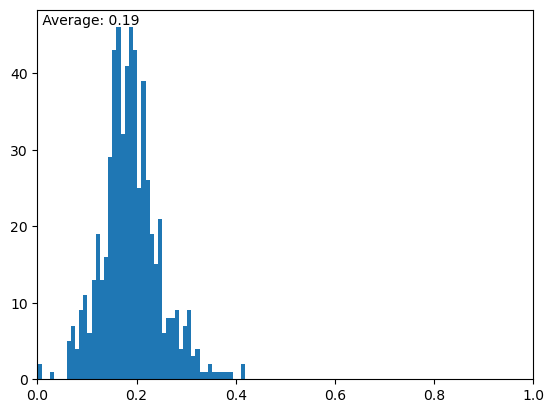

[18.55079394]


In [4]:
inference_predict(_type, benchmark, model_id, smiles)